In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
from utils import *

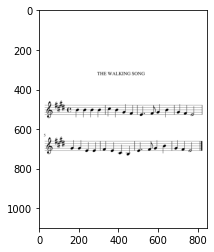

In [2]:
img = cv2.imread(r"C:\Users\nguye\Downloads\musicSheets\score_0 (1).png", cv2.IMREAD_GRAYSCALE)
retval, imgFindLine = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)
# img = imgFindLine
# image = cv2.imread(r"C:\Users\nguye\Downloads\Kmo04.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap = 'gray')

[479, 491, 503, 515, 527, 661, 673, 685, 697, 709]
There are 10 lines


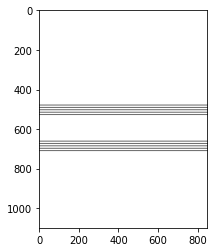

In [3]:
HEIGHT, WIDTH = img.shape

rowsWithLine = blackHorizontalLinesRowInd(imgFindLine, HEIGHT, WIDTH, 0.45)
trimmedRowsWithLine = trimRowsWithLine(rowsWithLine, minGap = 5)
plt.imshow(drawHorizontalLines(trimmedRowsWithLine, HEIGHT, WIDTH), cmap = 'gray')

print(trimmedRowsWithLine)
print('There are', len(trimmedRowsWithLine), 'lines')

In [4]:
clusterLst = linesClustering(trimmedRowsWithLine, minGap = 50)
avgLinesGap = averageLinesGap(clusterLst)

print('There are', len(clusterLst), 'line clusters')
print(clusterLst)
print('Average line gap:', avgLinesGap)

There are 2 line clusters
[[479, 491, 503, 515, 527], [661, 673, 685, 697, 709]]
Average line gap: 12.0


In [5]:
columnsWithLine = blackVerticalLinesColumnInd(imgFindLine, HEIGHT, WIDTH, clusterLst, threshold = 0.99)
columnsWithLine

{(479, 527): [332, 333, 334, 493, 494, 679, 680, 819, 820],
 (661, 709): [307,
  308,
  480,
  481,
  667,
  668,
  669,
  809,
  810,
  815,
  816,
  817,
  818,
  819,
  820,
  821]}

In [6]:
trimmedColumnsWithLine = trimColumnsWithLine(columnsWithLine, minGap = 100)
print(trimmedColumnsWithLine)

{(479, 527): [332, 493, 679, 819], (661, 709): [307, 480, 667, 809]}


88 33


Text(0.5, 1.0, 'Resize')

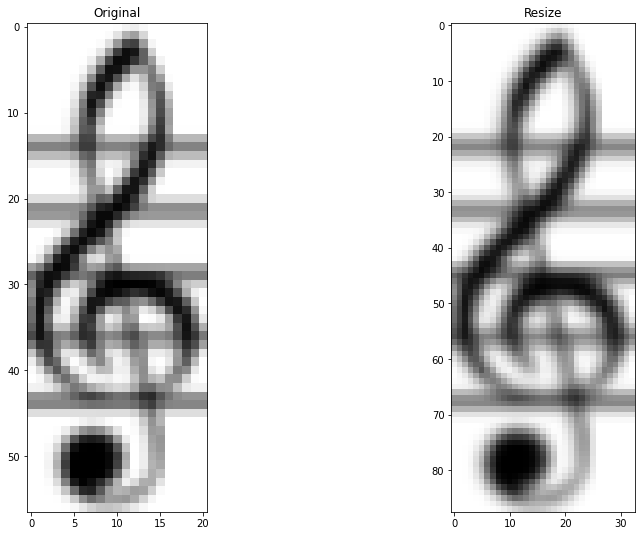

In [7]:
CLEF_W_H_RATIO = 3/8 #W/H
CLEF_H_LINE_GAP_RATIO = 7.35

CLEF_H = int(avgLinesGap * CLEF_H_LINE_GAP_RATIO)
CLEF_W = int(avgLinesGap * CLEF_H_LINE_GAP_RATIO * CLEF_W_H_RATIO)

clefTemplate = cv2.imread(r"C:\Users\nguye\Downloads\templates\clef\clef.png", cv2.IMREAD_GRAYSCALE)

clefTemplateResize = cv2.resize(clefTemplate, (CLEF_W, CLEF_H))
print(CLEF_H, CLEF_W)

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(clefTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(clefTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35,
       35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37,
       37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38], dtype=int64), array([457, 458, 459, 460, 639, 640, 641, 642, 456, 457, 458, 459, 460,
       461, 638, 639, 640, 641, 642, 643, 456, 457, 458, 459, 460, 461,
       637, 638, 639, 640, 641, 642, 643, 455, 456, 457, 458, 459, 460,
       461, 637, 638, 639, 640, 641, 642, 456, 457, 458, 459, 460, 638,
       639, 640, 641, 642], dtype=int64)) (56,)
After: (array([36, 36], dtype=int64), array([458, 640], dtype=int64)) (2,)


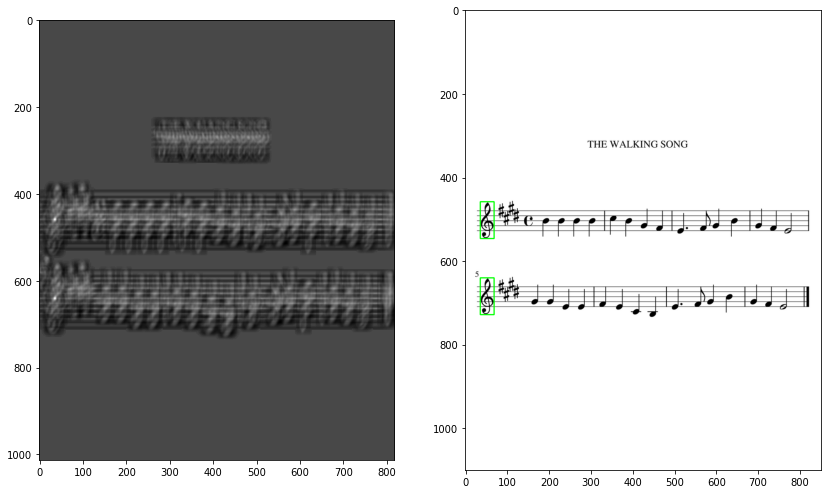

In [8]:
import sys
np.set_printoptions(threshold=sys.maxsize)

loc, res, imgCopy = matchTemplateRemake(img, clefTemplateResize, 0.45, True, True)

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(res, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(imgCopy, cmap = 'gray')

(12, 15) 19


Text(0.5, 1.0, 'Resize')

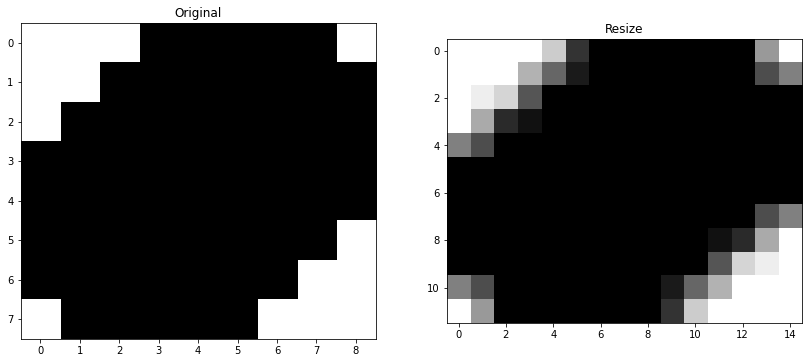

In [9]:
# blackNoteTemplate = cv2.imread(r"C:\Users\nguye\Downloads\quarter.png", cv2.IMREAD_GRAYSCALE)
# blackNoteTemplate = cv2.imread(r"C:\Users\nguye\Downloads\blackNote.png", cv2.IMREAD_GRAYSCALE)

blackNoteTemplate = np.array([
    [255, 255, 255, 0, 0, 0, 0, 0, 255],
    [255, 255, 0, 0, 0, 0, 0, 0, 0],
    [255, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 255],
    [0, 0, 0, 0, 0, 0, 0, 255, 255],
    [255, 0, 0, 0, 0, 0, 255, 255, 255],
], dtype = np.uint8) # Ratio W/H = 10/8 = 5/4

blackChosenSize, blackMaxMatched = tryTemplateMatchNote(img, blackNoteTemplate, 5/4, 0.9, avgLinesGap, error = 3)
print(blackChosenSize, blackMaxMatched)

blackTemplateSize = blackChosenSize[0]

# blackNoteTemplateResize = cv2.resize(blackNoteTemplate, (int(avgLinesGap), int(avgLinesGap)))
blackNoteTemplateResize = cv2.resize(blackNoteTemplate, (int(blackTemplateSize * (5/4)), int(blackTemplateSize)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(blackNoteTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(blackNoteTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([157, 157, 158, 158, 158, 159, 159, 159, 159, 160, 160, 160, 161,
       161, 161, 162, 162, 183, 183, 184, 184, 184, 185, 185, 185, 185,
       186, 186, 186, 187, 187, 187, 188, 188, 194, 194, 195, 195, 195,
       196, 196, 196, 196, 197, 197, 197, 198, 198, 198, 199, 199, 220,
       220, 221, 221, 221, 222, 222, 222, 222, 223, 223, 223, 224, 224,
       224, 225, 225, 225, 231, 231, 231, 232, 232, 232, 233, 233, 233,
       234, 234, 234, 234, 235, 235, 235, 236, 236, 257, 257, 258, 258,
       258, 259, 259, 259, 260, 260, 260, 261, 261, 261, 268, 269, 269,
       269, 270, 270, 270, 271, 271, 271, 271, 272, 272, 272, 273, 273,
       294, 294, 295, 295, 295, 296, 296, 296, 297, 297, 297, 298, 298,
       298, 299, 319, 320, 320, 320, 321, 321, 321, 322, 322, 322, 323,
       323, 324, 344, 344, 345, 345, 346, 346, 346, 347, 347, 347, 348,
       348, 359, 359, 359, 360, 360, 360, 361, 361, 361, 362, 362, 362,
       362, 363, 363, 363, 364, 364, 381, 381, 382, 382

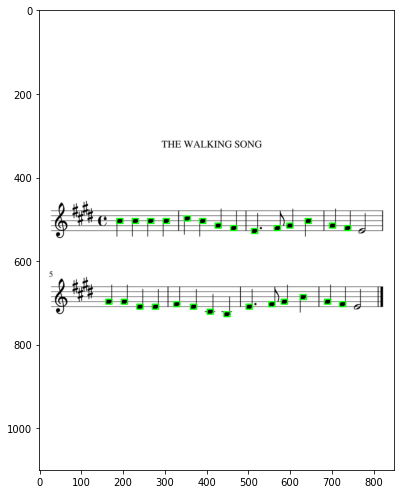

In [10]:
loc, res, imgCopy = matchTemplateRemake(img, blackNoteTemplateResize, 0.58, True, True)

plt.figure(figsize = (14, 9))
#plt.subplot(1, 2, 1); plt.imshow(res, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(imgCopy, cmap = 'gray')

In [11]:
# cv2.imwrite(r"C:\Users\nguye\Downloads\res.jpg", imgCopy)

(12, 15) 2


Text(0.5, 1.0, 'Resize')

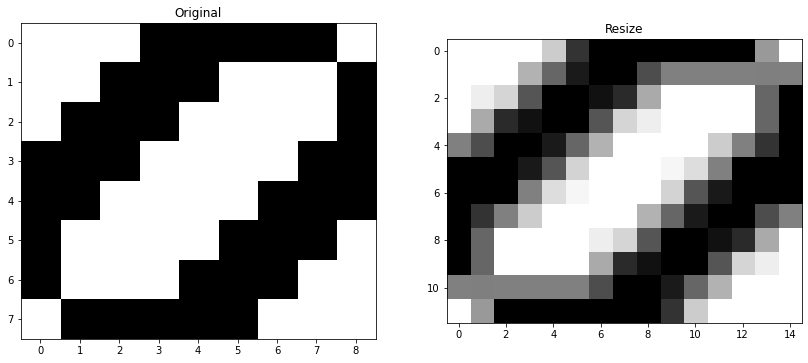

In [12]:
# whiteNoteTemplate = np.array([
#     [255, 255, 255, 0  , 0  , 0  , 0  , 0  , 255],
#     [255, 255, 0  , 0  , 255, 255, 255, 255, 0  ],
#     [255, 0  , 0  , 255, 255, 255, 255, 255, 0  ],
#     [0  , 0  , 255, 255, 255, 255, 255, 255, 0  ],
#     [0  , 255, 255, 255, 255, 255, 255, 0  , 0  ],
#     [0  , 255, 255, 255, 255, 255, 0  , 0  , 255],
#     [0  , 255, 255, 255, 255, 0  , 0  , 255, 255],
#     [255, 0  , 0  , 0  , 0  , 0  , 255, 255, 255],
# ], dtype = np.uint8) # Ratio W/H = 10/8 = 5/4

whiteNoteTemplate = np.array([
    [255, 255, 255, 0  , 0  , 0  , 0  , 0  , 255],
    [255, 255, 0  , 0  , 0  , 255, 255, 255, 0  ],
    [255, 0  , 0  , 0  , 255, 255, 255, 255, 0  ],
    [0  , 0  , 0  , 255, 255, 255, 255, 0  , 0  ],
    [0  , 0  , 255, 255, 255, 255, 0  , 0  , 0  ],
    [0  , 255, 255, 255, 255, 0  , 0  , 0  , 255],
    [0  , 255, 255, 255, 0  , 0  , 0  , 255, 255],
    [255, 0  , 0  , 0  , 0  , 0  , 255, 255, 255],
], dtype = np.uint8) # Ratio W/H = 10/8 = 5/4

whiteChosenSize, whiteMaxMatched = tryTemplateMatchNote(img, whiteNoteTemplate, 5/4, 0.7, avgLinesGap, error = 3)
print(whiteChosenSize, whiteMaxMatched)
whiteTemplateSize = whiteChosenSize[0]

# blackNoteTemplateResize = cv2.resize(blackNoteTemplate, (int(avgLinesGap), int(avgLinesGap)))
whiteNoteTemplateResize = cv2.resize(whiteNoteTemplate, (int(whiteTemplateSize * (5/4)), int(whiteTemplateSize)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(whiteNoteTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(whiteNoteTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([751, 752, 752, 753, 753, 754, 762, 763, 763, 764, 764, 765],
      dtype=int64), array([705, 704, 705, 703, 704, 703, 523, 522, 523, 521, 522, 521],
      dtype=int64)) (12,)
After: (array([752, 763], dtype=int64), array([704, 522], dtype=int64)) (2,)


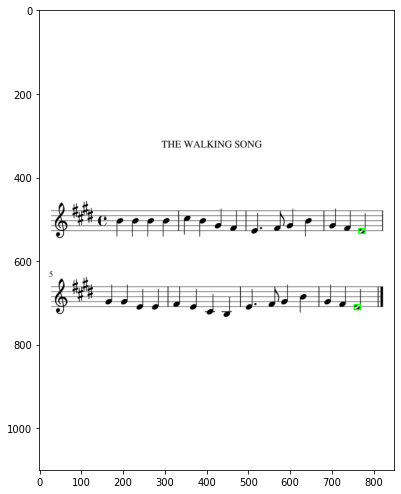

In [13]:
loc, res, imgCopy = matchTemplateRemake(img, whiteNoteTemplateResize, 0.6, True, True)

plt.figure(figsize = (14, 9))
#plt.subplot(1, 2, 1); plt.imshow(res, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(imgCopy, cmap = 'gray')

(9, 14) 0


Text(0.5, 1.0, 'Resize')

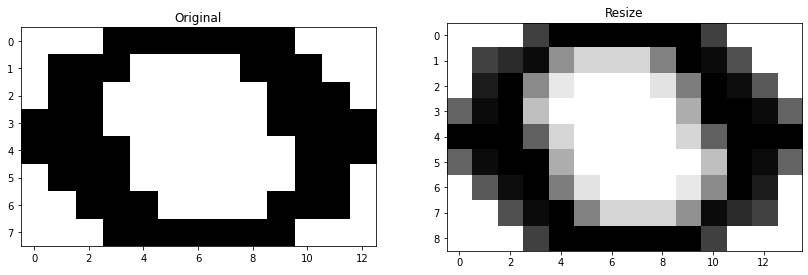

In [14]:
whiteAloneNoteTemplate = np.array([
    [255, 255, 255, 0  , 0  , 0  , 0  , 0  , 0  , 0  , 255, 255, 255],
    [255, 0  , 0  , 0  , 255, 255, 255, 255, 0  , 0  , 0  , 255, 255],
    [255, 0  , 0  , 255, 255, 255, 255, 255, 255, 0  , 0  , 0  , 255],
    [0  , 0  , 0  , 255, 255, 255, 255, 255, 255, 0  , 0  , 0  , 0  ],
    [0  , 0  , 0  , 0  , 255, 255, 255, 255, 255, 255, 0  , 0  , 0  ],
    [255, 0  , 0  , 0  , 255, 255, 255, 255, 255, 255, 0  , 0  , 255],
    [255, 255, 0  , 0  , 0  , 255, 255, 255, 255, 0  , 0  , 0  , 255],
    [255, 255, 255, 0  , 0  , 0  , 0  , 0  , 0  , 0  , 255, 255, 255],
], dtype = np.uint8) # Ratio W/H = 13/8

whiteAloneChosenSize, whiteAloneMaxMatched = tryTemplateMatchNote(img, whiteAloneNoteTemplate, 13/8, 0.7, avgLinesGap, error = 3)
print(whiteAloneChosenSize, whiteAloneMaxMatched)
whiteAloneTemplateSize = whiteAloneChosenSize[0]

whiteAloneNoteTemplateResize = cv2.resize(whiteAloneNoteTemplate, (int(whiteAloneTemplateSize * (13/8)), int(whiteAloneTemplateSize)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(whiteAloneNoteTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(whiteAloneNoteTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([465], dtype=int64), array([320], dtype=int64)) (1,)
After: (array([465], dtype=int64), array([320], dtype=int64)) (1,)


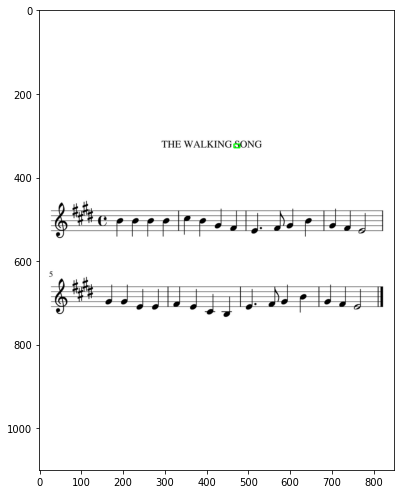

In [15]:
loc, res, imgCopy = matchTemplateRemake(img, whiteAloneNoteTemplateResize, 0.6, True, True)

plt.figure(figsize = (14, 9))
#plt.subplot(1, 2, 1); plt.imshow(res, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(imgCopy, cmap = 'gray')

36


Text(0.5, 1.0, 'Resize')

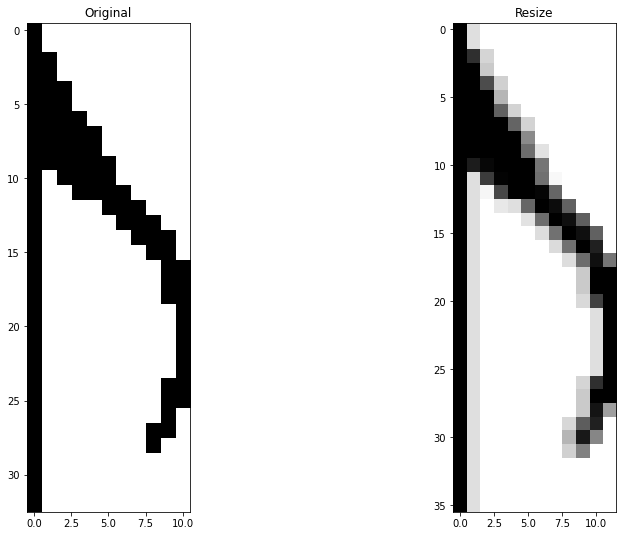

In [16]:
hookTemplate = np.array([
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 0  , 255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 0  , 255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 0  , 0  , 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 0  , 0  , 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 0  , 0  , 0  , 255, 255, 255, 255, 255, 255, 255],
    [0  , 0  , 0  , 0  , 0  , 255, 255, 255, 255, 255, 255],
    [0  , 0  , 0  , 0  , 0  , 255, 255, 255, 255, 255, 255],
    [0  , 0  , 0  , 0  , 0  , 0  , 255, 255, 255, 255, 255],
    [0  , 255, 0  , 0  , 0  , 0  , 255, 255, 255, 255, 255],
    [0  , 255, 255, 0  , 0  , 0  , 0  , 255, 255, 255, 255],
    [0  , 255, 255, 255, 255, 0  , 0  , 0  , 255, 255, 255],
    [0  , 255, 255, 255, 255, 255, 0  , 0  , 0  , 255, 255],
    [0  , 255, 255, 255, 255, 255, 255, 0  , 0  , 0  , 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 0  , 0  , 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 0  , 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 0  , 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 0  , 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 0  , 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 0  , 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 0  , 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 0  , 0  , 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 0  , 255, 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
], dtype = np.uint8) # Ratio W/H = 1/3

# hookChosenSize, hookMaxMatched = tryTemplateMatchNote(img, hookTemplate, 1/3, 0.7, avgLinesGap, error = 3)
# print(hookChosenSize, hookMaxMatched)
hookChosenSize = int(avgLinesGap * 3)
print(hookChosenSize)
hookTemplateSize = hookChosenSize

hookTemplateResize = cv2.resize(hookTemplate, (int(hookTemplateSize * (1/3)), int(hookTemplateSize)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(hookTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(hookTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([562, 575, 575, 575, 575], dtype=int64), array([664, 481, 482, 483, 484], dtype=int64)) (5,)
After: (array([575, 562], dtype=int64), array([482, 664], dtype=int64)) (2,)


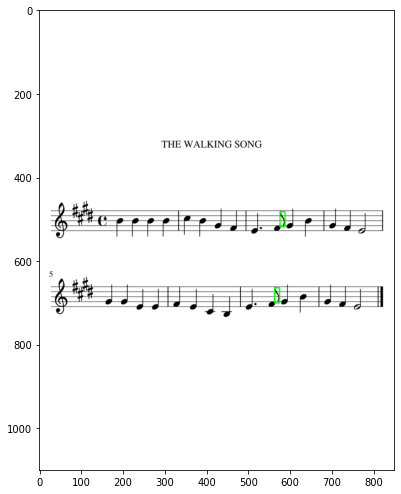

In [17]:
loc, res, imgCopy = matchTemplateRemake(img, hookTemplateResize, 0.6, True, True)

plt.figure(figsize = (14, 9))
# plt.subplot(1, 2, 1); plt.imshow(res, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(imgCopy, cmap = 'gray')

36


Text(0.5, 1.0, 'Resize')

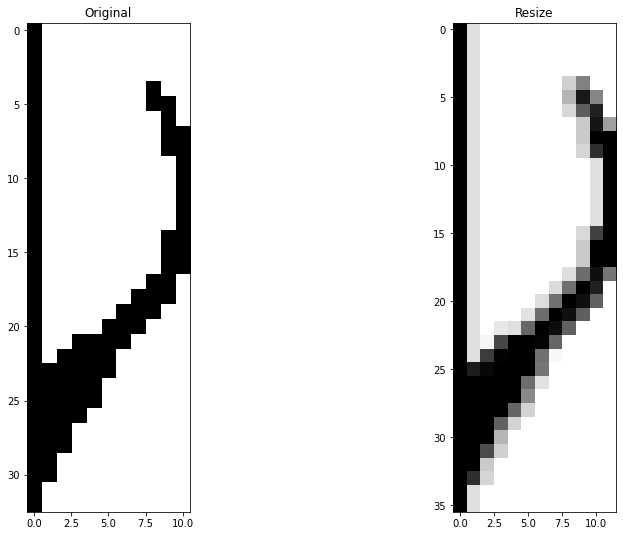

In [18]:
hookRotatedTemplate =  cv2.flip(hookTemplate, 0) # Ratio W/H = 1/3

# hookRotatedChosenSize, hookRotatedMaxMatched = tryTemplateMatchNote(img, hookRotatedTemplate, 1/3, 0.7, avgLinesGap, error = 3)
# print(hookRotatedChosenSize, hookRotatedMaxMatched)
hookRotatedChosenSize = int(avgLinesGap * 3)
print(hookRotatedChosenSize)
hookRotatedTemplateSize = hookRotatedChosenSize

hookRotatedTemplateResize = cv2.resize(hookRotatedTemplate, (int(hookRotatedTemplateSize * (1/3)), int(hookRotatedTemplateSize)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(hookRotatedTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(hookRotatedTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([820, 820, 820, 820, 820, 820, 820, 820, 820, 820, 820, 820, 820,
       820, 820, 820, 820, 820, 820, 820, 820, 820, 820, 820, 820, 820,
       820, 820, 820, 821, 821, 821, 821, 821, 821, 821, 821, 821, 821,
       821, 821, 821, 821, 821, 821, 821, 821, 821, 821, 821, 821, 821,
       821, 821, 821, 821, 821, 821, 823, 823, 823, 823, 823, 823, 823,
       823, 823, 823, 823, 823, 823, 823, 823, 823, 823, 823, 823, 823,
       823, 823, 823, 823, 823, 823, 823, 823, 823, 823], dtype=int64), array([479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671,
       672, 673, 674, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488,
       489, 490, 491, 492, 493, 661, 662, 663, 664, 665, 666, 667, 668,
       669, 670, 671, 672, 673, 674, 479, 480, 481, 482, 483, 484, 485,
       486, 487, 488, 489, 490, 491, 492, 493, 661, 662, 663, 664, 665,
       666, 667, 668, 669, 670, 671, 672, 673, 674, 675

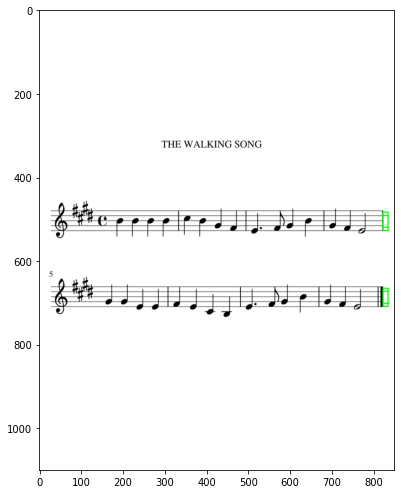

In [19]:
loc, res, imgCopy = matchTemplateRemake(img, hookRotatedTemplateResize, 0.55, True, True)

plt.figure(figsize = (14, 9))
# plt.subplot(1, 2, 1); plt.imshow(res, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(imgCopy, cmap = 'gray')

52


Text(0.5, 1.0, 'Resize')

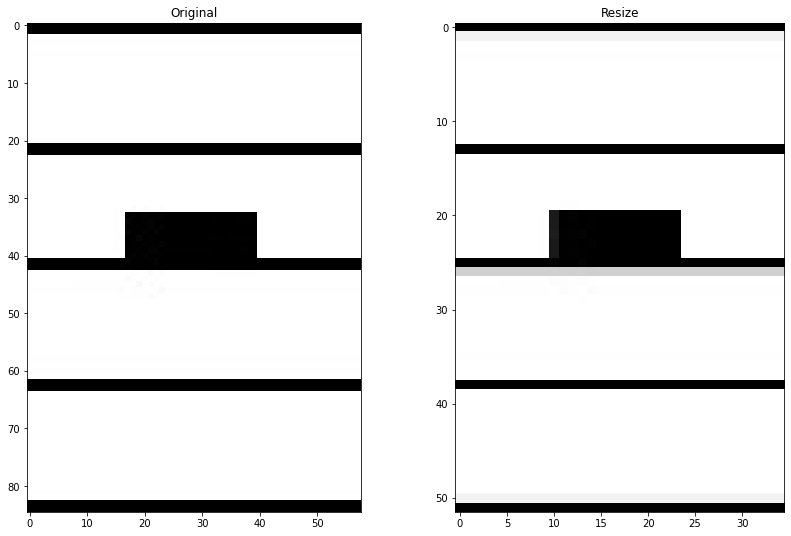

In [20]:
halfRestTemplate = cv2.imread(r"C:\Users\nguye\Downloads\templates\rest\half_rest_1.jpg", cv2.IMREAD_GRAYSCALE) # Ratio W/H = 58/85

halfRestChosenSize = int(int(avgLinesGap) + 1)*4
print(halfRestChosenSize)
halfRestTemplateSize = halfRestChosenSize

halfRestTemplateResize = cv2.resize(halfRestTemplate, (int(halfRestTemplateSize * (58/85)), int(halfRestTemplateSize)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(halfRestTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(halfRestTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([], dtype=float64), array([], dtype=float64)) (0,)
After: (array([], dtype=float64), array([], dtype=float64)) (0,)


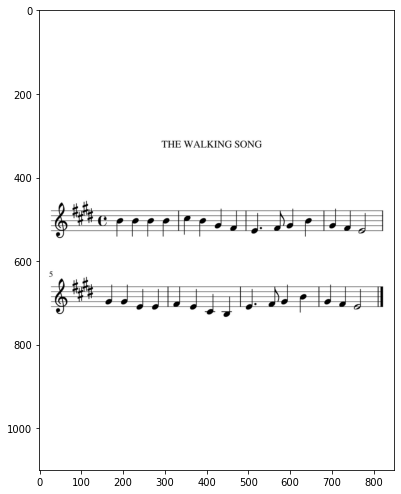

In [21]:
loc, res, imgCopy = matchTemplateRemake(img, halfRestTemplateResize, 0.8, True, True)

plt.figure(figsize = (14, 9))
#plt.subplot(1, 2, 1); plt.imshow(res, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(imgCopy, cmap = 'gray')